In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os

os. environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [6]:
# 뉴스(Reuters) 에서 자주 사용되는 상위 1000 개의 단어만 가져온다? 
# => 빈도 수가 낮은 데이터는 처리하지 않음.
# oov_char = Out Of Vocabulary
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [7]:
# 0 ~ 45 => 46개의 카테고리
np.max(y_train)

45

In [8]:
# 8982개의 기사
X_train.shape

(8982,)

In [9]:
X_test.shape

(2246,)

In [10]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [11]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train.shape

(8982, 46)

In [15]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100))
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience=5)

h = model.fit(X_train, y_train, epochs=200, batch_size=20, 
              validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/200
450/450 [==============================] - 19s 38ms/step - loss: 2.1845 - accuracy: 0.4412 - val_loss: 2.0507 - val_accuracy: 0.5022
Epoch 2/200
450/450 [==============================] - 17s 37ms/step - loss: 1.8824 - accuracy: 0.5181 - val_loss: 1.7655 - val_accuracy: 0.5601
Epoch 3/200
450/450 [==============================] - 17s 37ms/step - loss: 1.6847 - accuracy: 0.5655 - val_loss: 1.6868 - val_accuracy: 0.5579
Epoch 4/200
450/450 [==============================] - 17s 37ms/step - loss: 1.5836 - accuracy: 0.5921 - val_loss: 1.6049 - val_accuracy: 0.5810
Epoch 5/200
450/450 [==============================] - 17s 37ms/step - loss: 1.4526 - accuracy: 0.6287 - val_loss: 1.4449 - val_accuracy: 0.6376
Epoch 6/200
450/450 [==============================] - 17s 37ms/step - loss: 1.2990 - accuracy: 0.6676 - val_loss: 1.3285 - val_accuracy: 0.6647
Epoch 7/200
450/450 [==============================] - 17s 37ms/step - loss: 1.1606 - accuracy: 0.7041 - val_loss: 1.2412 - val_ac

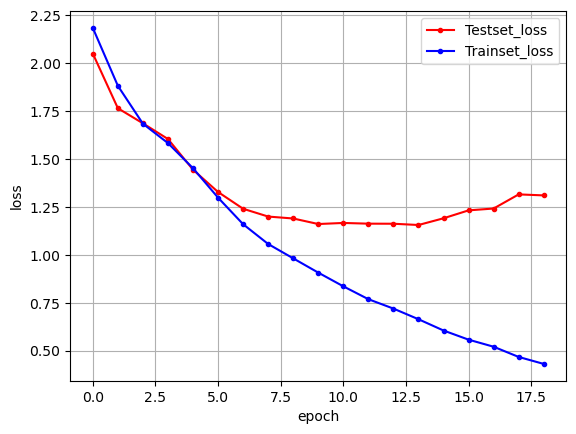

In [20]:
y_vloss = h.history['val_loss']
y_loss = h.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()